<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.238076,36.937722,-0.267005,69.908793,70.155204,-0.246412
1,0.0,1.0,37.660320,45.771825,0.285592,93.717737,93.405197,0.312540
2,0.0,2.0,31.267746,89.996827,0.085345,131.349918,131.190225,0.159693
3,0.0,3.0,39.017935,67.479644,-0.218037,116.279542,116.448255,-0.168713
4,0.0,4.0,33.298088,91.453448,-0.036437,134.715099,134.676071,0.039028
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.422740,29.503264,-0.194410,72.731593,72.873895,-0.142302
19996,999.0,16.0,42.179793,35.670256,0.160490,88.010538,87.818731,0.191807
19997,999.0,17.0,22.296487,78.678699,-0.244537,110.730649,110.834621,-0.103972
19998,999.0,18.0,90.375315,84.922144,0.023994,185.321453,185.363904,-0.042451


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.238076  36.937722 -0.267005   69.908793   70.155204 -0.246412
      1.0    37.660320  45.771825  0.285592   93.717737   93.405197  0.312540
      2.0    31.267746  89.996827  0.085345  131.349918  131.190225  0.159693
      3.0    39.017935  67.479644 -0.218037  116.279542  116.448255 -0.168713
      4.0    33.298088  91.453448 -0.036437  134.715099  134.676071  0.039028
...                ...        ...       ...         ...         ...       ...
999.0 15.0   33.422740  29.503264 -0.194410   72.731593   72.873895 -0.142302
      16.0   42.179793  35.670256  0.160490   88.010538   87.818731  0.191807
      17.0   22.296487  78.678699 -0.244537  110.730649  110.834621 -0.103972
      18.0   90.375315  84.922144  0.023994  185.321453  185.363904 -0.042451
      19.0   66.632221  60.898240 -0.196627  137.333833  137.548483 -0.214650

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.238076  36.937722 -0.267005   69.908793   70.155204 -0.246412
      1.0    37.660320  45.771825  0.285592   93.717737   93.405197  0.312540
      2.0    31.267746  89.996827  0.085345  131.349918  131.190225  0.159693
      3.0    39.017935  67.479644 -0.218037  116.279542  116.448255 -0.168713
      4.0    33.298088  91.453448 -0.036437  134.715099  134.676071  0.039028
...                ...        ...       ...         ...         ...       ...
999.0 15.0   33.422740  29.503264 -0.194410   72.731593   72.873895 -0.142302
      16.0   42.179793  35.670256  0.160490   88.010538   87.818731  0.191807
      17.0   22.296487  78.678699 -0.244537  110.730649  110.834621 -0.103972
      18.0   90.375315  84.922144  0.023994  185.321453  185.363904 -0.042451
      19.0   66.632221  60.898240 -0.196627  137.333833  137.548483 -0.214650

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.238076,36.937722,-0.267005,69.908793,70.155204,-0.246412
1,0.0,1.0,37.660320,45.771825,0.285592,93.717737,93.405197,0.312540
2,0.0,2.0,31.267746,89.996827,0.085345,131.349918,131.190225,0.159693
3,0.0,3.0,39.017935,67.479644,-0.218037,116.279542,116.448255,-0.168713
4,0.0,4.0,33.298088,91.453448,-0.036437,134.715099,134.676071,0.039028
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.422740,29.503264,-0.194410,72.731593,72.873895,-0.142302
19996,999.0,16.0,42.179793,35.670256,0.160490,88.010538,87.818731,0.191807
19997,999.0,17.0,22.296487,78.678699,-0.244537,110.730649,110.834621,-0.103972
19998,999.0,18.0,90.375315,84.922144,0.023994,185.321453,185.363904,-0.042451


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    23.238076  36.937722 -0.267005   69.908793   70.155204 -0.246412
      1.0    37.660320  45.771825  0.285592   93.717737   93.405197  0.312540
      2.0    31.267746  89.996827  0.085345  131.349918  131.190225  0.159693
      3.0    39.017935  67.479644 -0.218037  116.279542  116.448255 -0.168713
      4.0    33.298088  91.453448 -0.036437  134.715099  134.676071  0.039028
...                ...        ...       ...         ...         ...       ...
999.0 15.0   33.422740  29.503264 -0.194410   72.731593   72.873895 -0.142302
      16.0   42.179793  35.670256  0.160490   88.010538   87.818731  0.191807
      17.0   22.296487  78.678699 -0.244537  110.730649  110.834621 -0.103972
      18.0   90.375315  84.922144  0.023994  185.321453  185.363904 -0.042451
      19.0   66.632221  60.898240 -0.196627  137.333833  137.548483 -0.214650

[20000 rows x 6 columns]

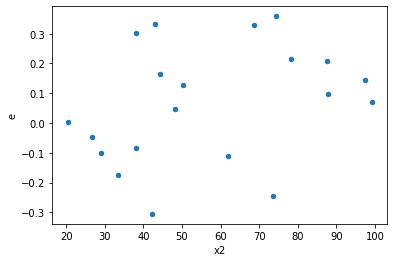

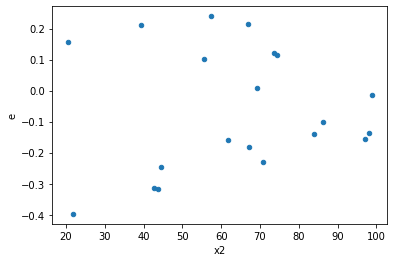

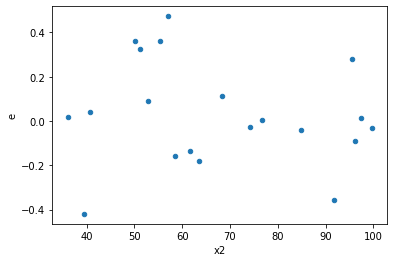

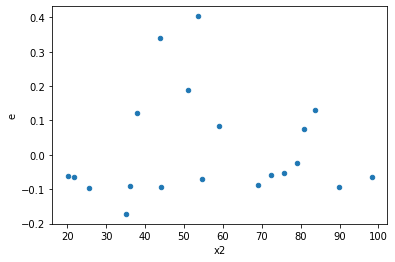

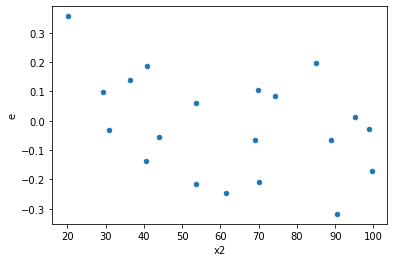

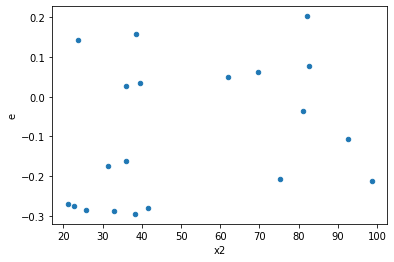

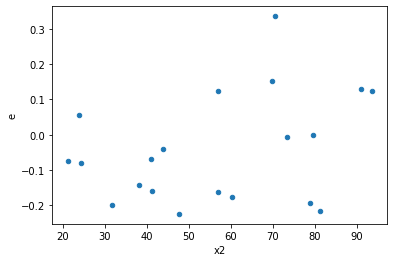

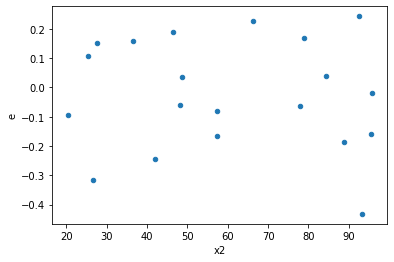

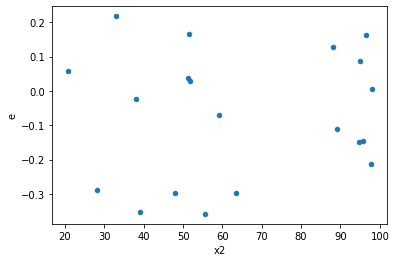

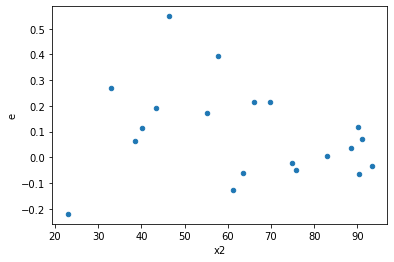

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,13.0,3.0,0.7098370134842408,0.24314329622521,0.05460284719109544,0.08104776540840333,1.4843139062832698,0.8333663225002605,0.5833168387498697,0.4166831612501303,Reject005=1 : Homoscedasticity
2.0,11.0,5.0,0.08934703080490781,0.10509745744873085,0.00812245734590071,0.02101949148974617,2.587824176184121,0.3039520877868609,0.8480239561065696,0.15197604389343045,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,0.06951160824121219,0.13200031508598523,0.008688951030151524,0.016500039385748153,1.8989679339302725,0.3832108059145969,0.8083945970427016,0.19160540295729844,Reject005=1 : Homoscedasticity
5.0,9.0,7.0,0.31243531113486167,0.4160695095419619,0.03471503457054018,0.05943850136313742,1.712183268674548,0.4907226123714128,0.7546386938142936,0.2453613061857064,Reject005=1 : Homoscedasticity
6.0,4.0,12.0,0.058669137704935856,0.3089123702820363,0.014667284426233964,0.025742697523503024,1.755109996875736,0.4054346575248784,0.7972826712375608,0.2027173287624392,Reject005=1 : Homoscedasticity
7.0,11.0,5.0,0.15799088659745467,0.24257232765545778,0.01436280787249588,0.04851446553109155,3.3777842022098294,0.18964811011822413,0.9051759449408879,0.09482405505911207,Reject005=1 : Homoscedasticity
9.0,4.0,12.0,0.08181439649996124,0.5033827358922267,0.02045359912499031,0.04194856132435223,2.0509134391462314,0.3017362896403841,0.8491318551798079,0.15086814482019206,Reject005=1 : Homoscedasticity
11.0,6.0,10.0,0.15312042820808633,0.3269833725083792,0.025520071368014388,0.03269833725083792,1.2812792244703681,0.693933757955461,0.6530331210222695,0.3469668789777305,Reject005=1 : Homoscedasticity
13.0,11.0,5.0,0.1868656744023148,0.139538099474166,0.01698778858202862,0.027907619894833202,1.6428047570804285,0.608895660109374,0.695552169945313,0.304447830054687,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,7.0,0.4781927275131006,0.15776617793202774,0.0531325252792334,0.022538025418861105,0.4241850975539833,0.2302536716895611,Reject005=1 : Homoscedasticity
1.0,13.0,3.0,0.7098370134842408,0.24314329622521,0.05460284719109544,0.08104776540840333,1.4843139062832698,0.8333663225002605,Reject005=1 : Homoscedasticity
2.0,11.0,5.0,0.08934703080490781,0.10509745744873085,0.00812245734590071,0.02101949148974617,2.587824176184121,0.3039520877868609,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,0.06951160824121219,0.13200031508598523,0.008688951030151524,0.016500039385748153,1.8989679339302725,0.3832108059145969,Reject005=1 : Homoscedasticity
4.0,9.0,7.0,0.4831454798909411,0.20474022824789764,0.05368283109899345,0.02924860403541395,0.5448409377195153,0.3897223773051458,Reject005=1 : Homoscedasticity
5.0,9.0,7.0,0.31243531113486167,0.4160695095419619,0.03471503457054018,0.05943850136313742,1.712183268674548,0.4907226123714128,Reject005=1 : Homoscedasticity
6.0,4.0,12.0,0.058669137704935856,0.3089123702820363,0.014667284426233964,0.025742697523503024,1.755109996875736,0.4054346575248784,Reject005=1 : Homoscedasticity
7.0,11.0,5.0,0.15799088659745467,0.24257232765545778,0.01436280787249588,0.04851446553109155,3.3777842022098294,0.18964811011822413,Reject005=1 : Homoscedasticity
8.0,5.0,11.0,0.31521693281231955,0.21093572499411395,0.06304338656246392,0.019175974999464905,0.30417108034742374,0.19933155747889755,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      825
Reject005=0 : Heteroscedasticity    175
Name: Result_test, dtype: int64